<a href="https://colab.research.google.com/github/isllam-colon/Hotel-Booking/blob/main/firstTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('first inten project.csv')
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
print (data.isnull().sum())

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
36280,False
36281,False
36282,False
36283,False


In [ ]:
sum(data.duplicated())

0

In [ ]:
data['total_guests'] = data['number of adults'] + data['number of children']


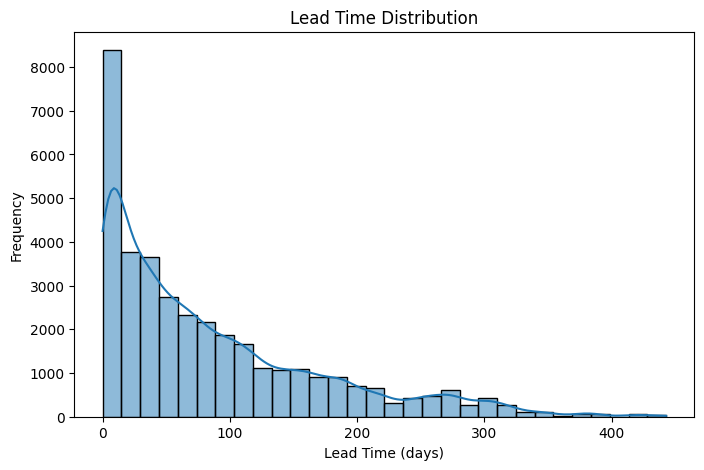

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['lead time'], bins=30, kde=True)
plt.title('Lead Time Distribution')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


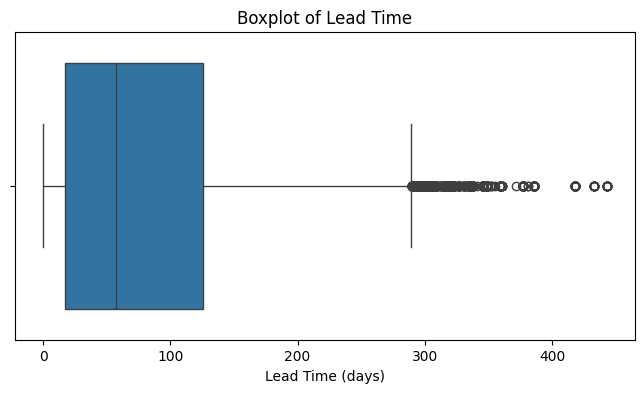

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['lead time'])
plt.title('Boxplot of Lead Time')
plt.xlabel('Lead Time (days)')
plt.show()


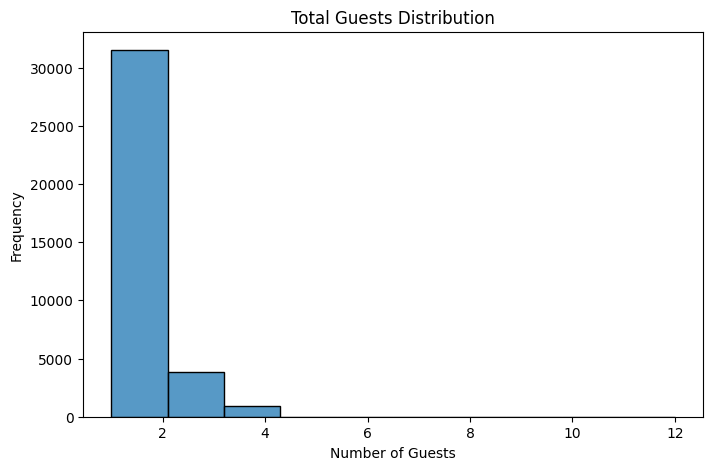

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data['total_guests'], bins=10, kde=False)
plt.title('Total Guests Distribution')
plt.xlabel('Number of Guests')
plt.ylabel('Frequency')
plt.show()


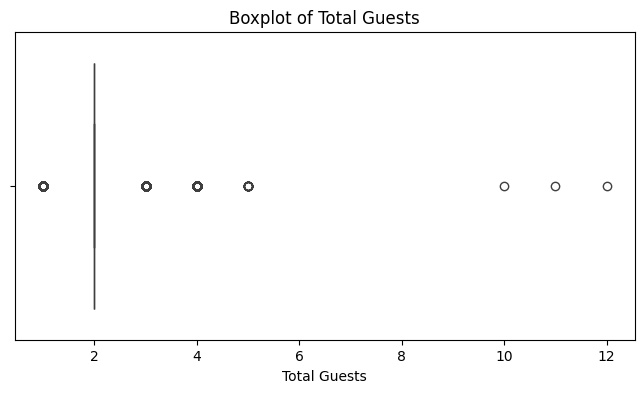

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['total_guests'])
plt.title('Boxplot of Total Guests')
plt.xlabel('Total Guests')
plt.show()


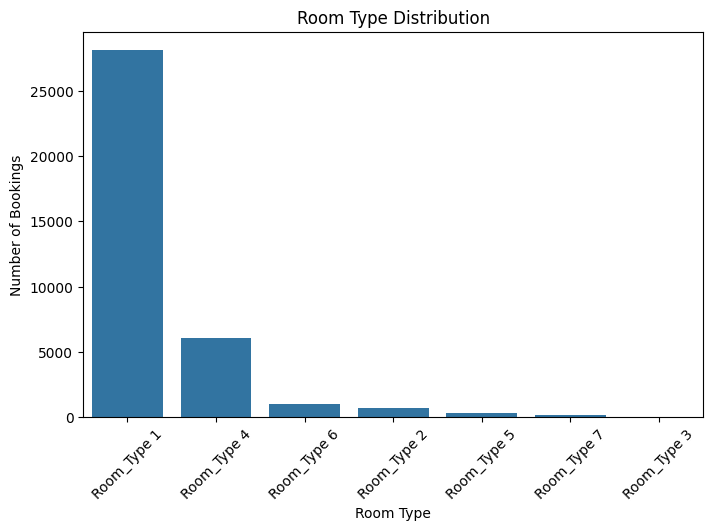

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room type', data=data, order=data['room type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

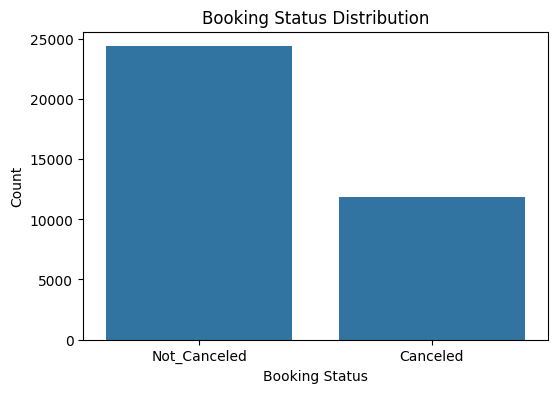

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='booking status', data=data, order=data['booking status'].value_counts().index)
plt.title('Booking Status Distribution')
plt.xlabel('Booking Status')
plt.ylabel('Count')
plt.show()


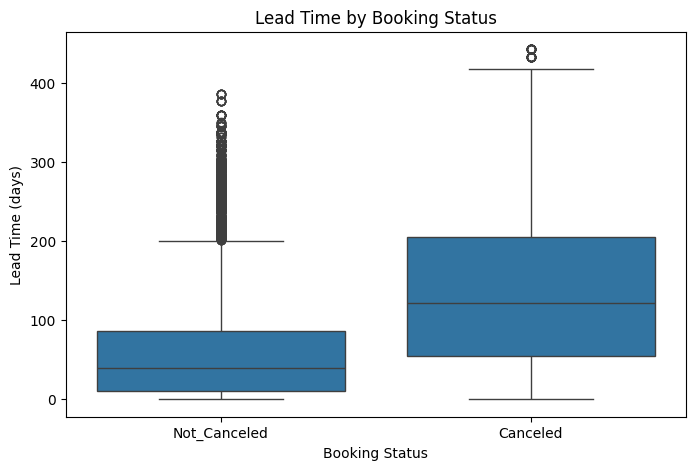

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='booking status', y='lead time', data=data)
plt.title('Lead Time by Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.show()


In [ ]:
print(data.columns.tolist())


['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests', 'date of reservation', 'booking status']


In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')


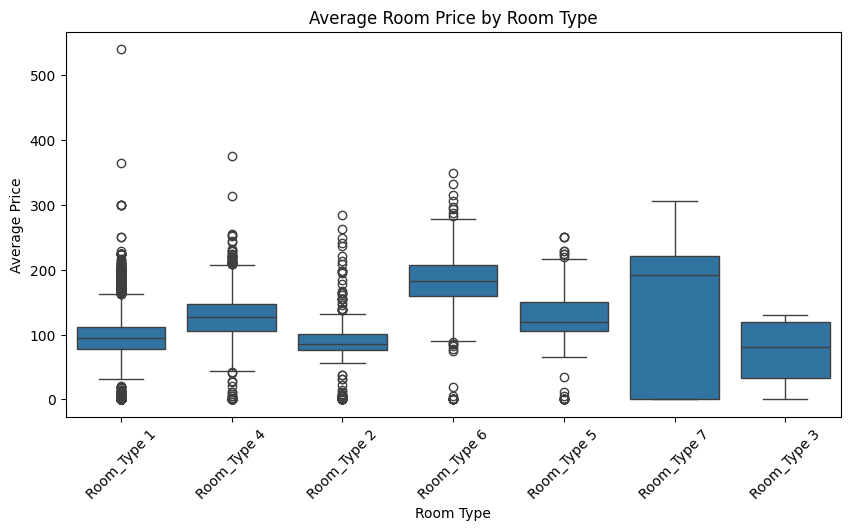

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='room_type', y='average_price', data=data)
plt.title('Average Room Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


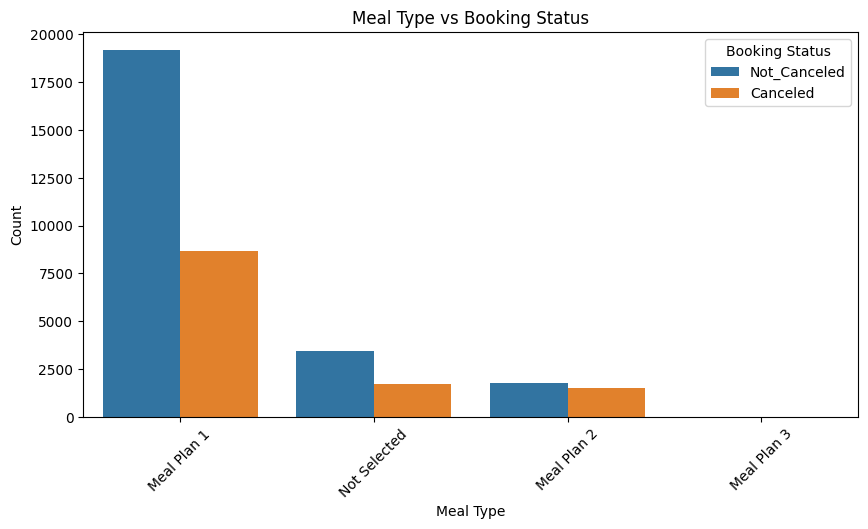

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='type_of_meal', hue='booking_status', data=data)
plt.title('Meal Type vs Booking Status')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.legend(title='Booking Status')
plt.xticks(rotation=45)
plt.show()


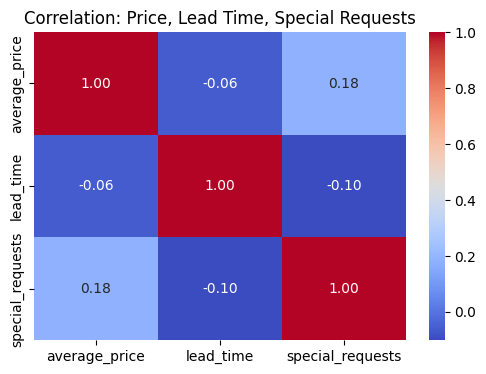

In [ ]:
# Optional: rename columns first (if you haven't yet)
data.columns = data.columns.str.strip().str.replace(' ', '_')

# Select relevant numeric columns
corr_columns = ['average_price', 'lead_time', 'special_requests']
corr_matrix = data[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Price, Lead Time, Special Requests')
plt.show()


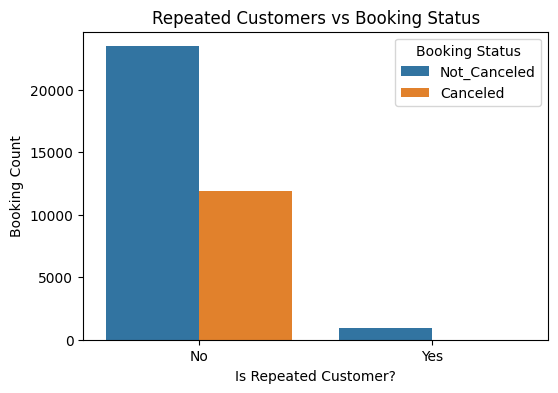

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='repeated', hue='booking_status', data=data)
plt.title('Repeated Customers vs Booking Status')
plt.xlabel('Is Repeated Customer?')
plt.ylabel('Booking Count')
plt.legend(title='Booking Status')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
a = 5.4
b = 3
c = int(a//1) * b
print(c)

15


In [ ]:
income = int(input("Enter average monthly income: "))
weekend_hours = int(input("Enter number of weekend working hours: "))
print("Overtime payment:", income * 0.01 * weekend_hours)


Enter average monthly income: 70000
Enter number of weekend working hours: 24
Overtime payment: 16800.0
